In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

In [3]:
df=pd.read_csv(url,header=1)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.shape

(246, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df["Temperature"].value_counts()

35             29
31             25
34             24
33             23
30             22
32             21
36             21
29             18
28             15
37              9
27              8
25              6
39              6
26              5
24              3
38              3
40              3
22              2
Temperature     1
42              1
Name: Temperature, dtype: int64

In [9]:
df["day"].value_counts()

01                               8
02                               8
30                               8
29                               8
28                               8
27                               8
26                               8
25                               8
24                               8
23                               8
22                               8
21                               8
20                               8
19                               8
18                               8
17                               8
16                               8
15                               8
03                               8
04                               8
05                               8
06                               8
07                               8
08                               8
09                               8
10                               8
11                               8
12                               8
13                  

In [10]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [11]:
df[df['day']=='Sidi-Bel Abbes Region Dataset']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df['year'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [14]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [15]:
df.drop([122,123],inplace=True)

In [16]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [17]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [18]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.dropna(inplace=True)

In [22]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [23]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [24]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [25]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [26]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [27]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [28]:
df1=df.drop(['year'],axis=1)

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


Encoding not fire as 0 and Fire as 1

In [30]:
df1['Classes']=np.where(df1['Classes']=='not fire ',0,1)

In [31]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [32]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,NaN,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,NaN,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,NaN,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,NaN,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,NaN,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,NaN,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,NaN,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,NaN,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,NaN,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,NaN,0.263197


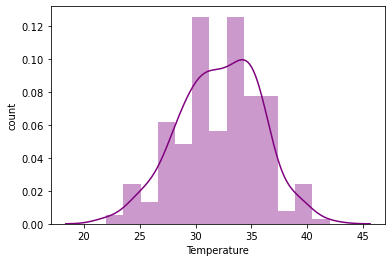

In [33]:
sns.distplot(df1['Temperature'], color = 'purple')
plt.xlabel('Temperature')
plt.ylabel('count')
plt.show()

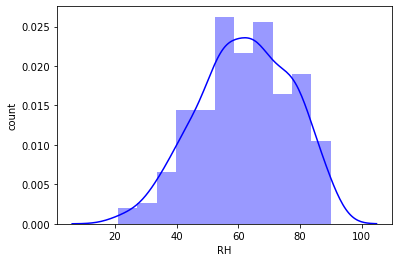

In [34]:
sns.distplot(df1['RH'], color = 'blue')
plt.xlabel('RH')
plt.ylabel('count')
plt.show()

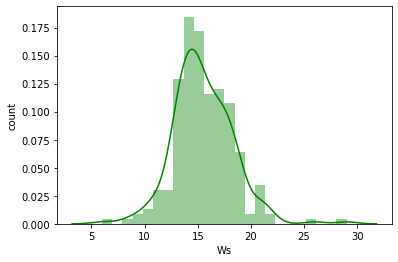

In [35]:
sns.distplot(df1['Ws'], color = 'green')
plt.xlabel('Ws')
plt.ylabel('count')
plt.show()

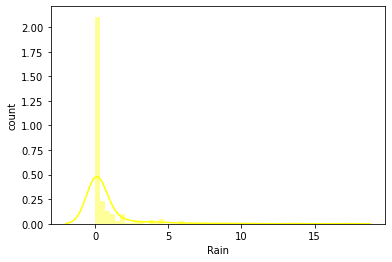

In [36]:
sns.distplot(df1['Rain'], color = 'yellow')
plt.xlabel('Rain')
plt.ylabel('count')
plt.show()

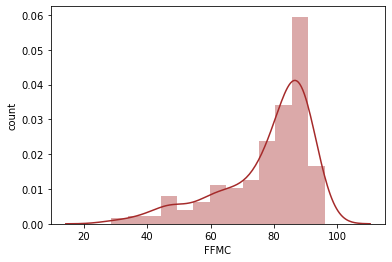

In [37]:
sns.distplot(df1['FFMC'], color = 'brown')
plt.xlabel('FFMC')
plt.ylabel('count')
plt.show()

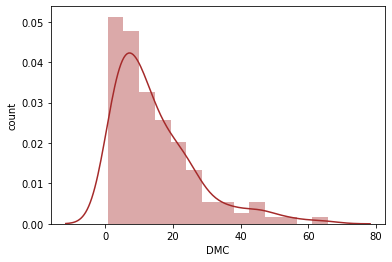

In [38]:
sns.distplot(df1['DMC'], color = 'brown')
plt.xlabel('DMC')
plt.ylabel('count')
plt.show()

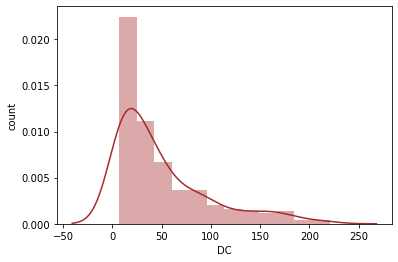

In [39]:
sns.distplot(df1['DC'], color = 'brown')
plt.xlabel('DC')
plt.ylabel('count')
plt.show()

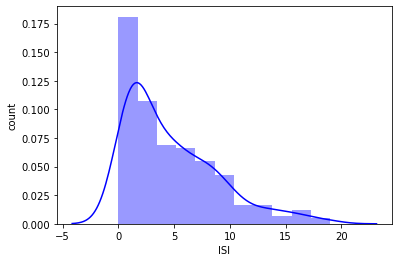

In [40]:
sns.distplot(df1['ISI'], color = 'blue')
plt.xlabel('ISI')
plt.ylabel('count')
plt.show()

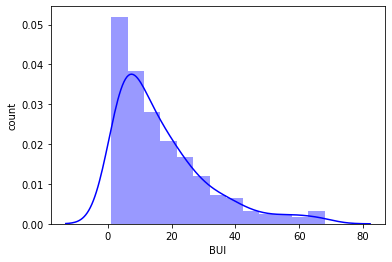

In [41]:
sns.distplot(df1['BUI'], color = 'blue')
plt.xlabel('BUI')
plt.ylabel('count')
plt.show()

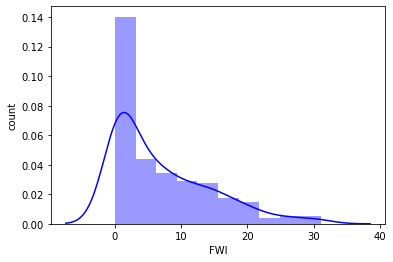

In [42]:
sns.distplot(df1['FWI'], color = 'blue')
plt.xlabel('FWI')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Before Removing Outliers')

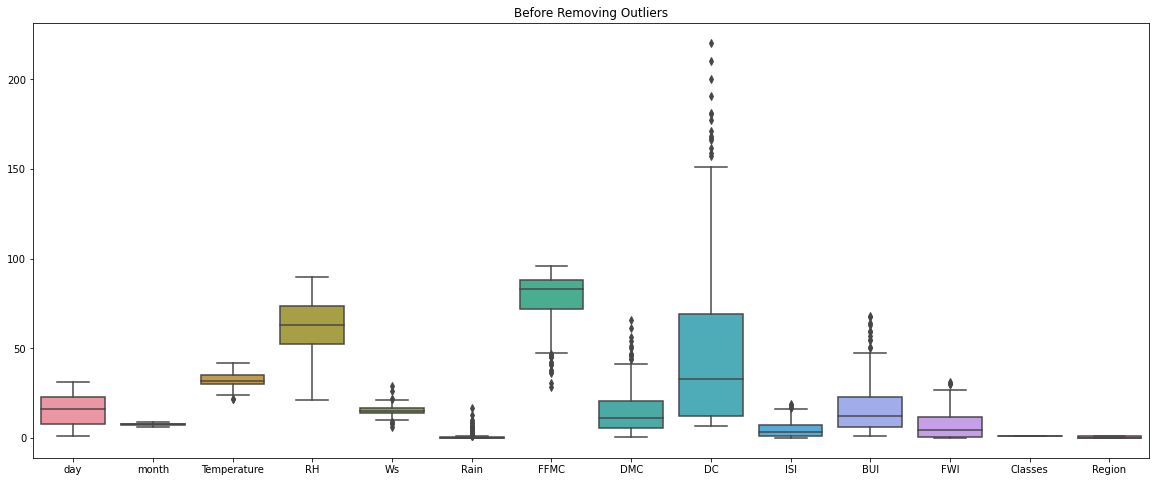

In [43]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df1)
plt.title("Before Removing Outliers")

Text(0.5, 1.0, 'Before Removing Outliers')

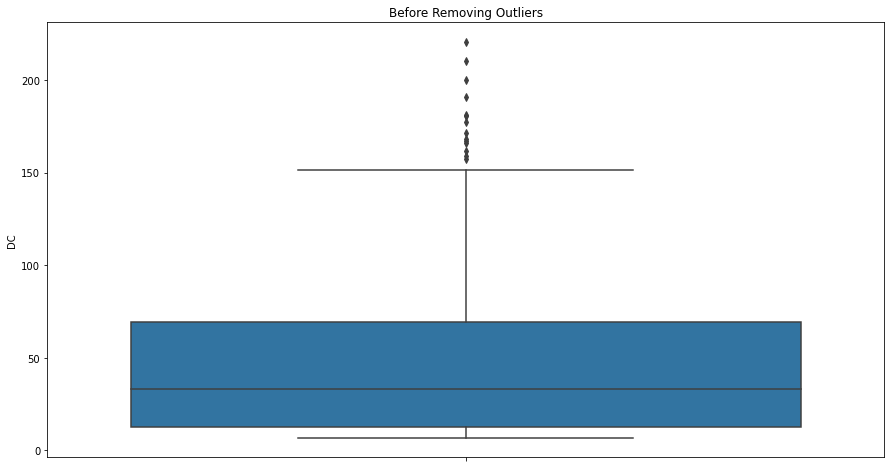

In [44]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, y= 'DC')
plt.title("Before Removing Outliers")

<AxesSubplot:>

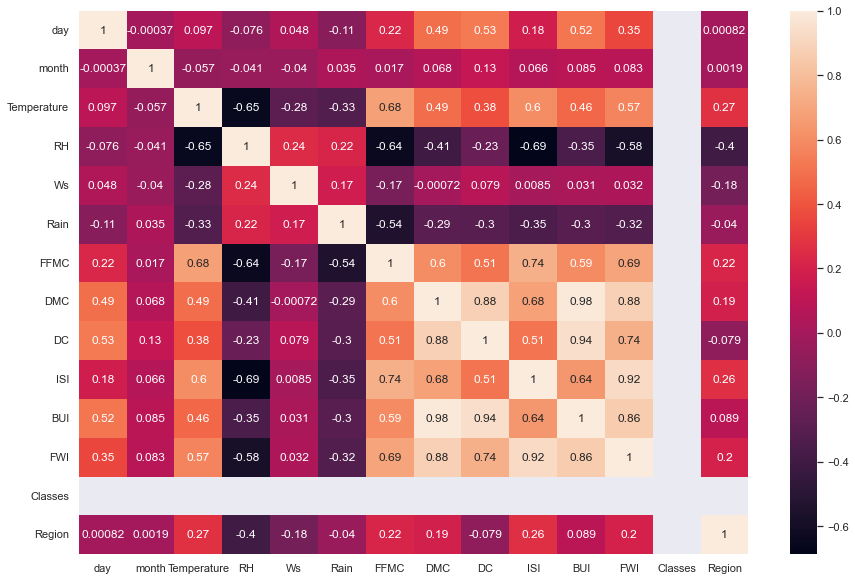

In [45]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

Text(0, 0.5, 'Temperature')

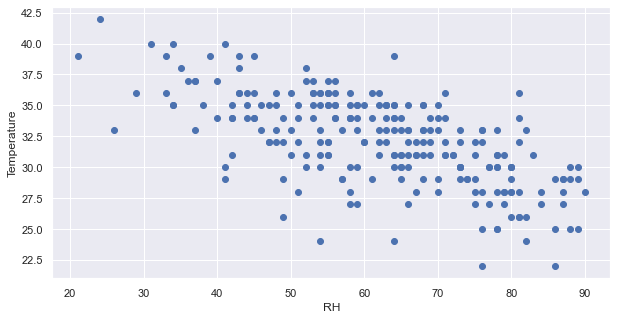

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df1['RH'],df1['Temperature'])
plt.xlabel("RH")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

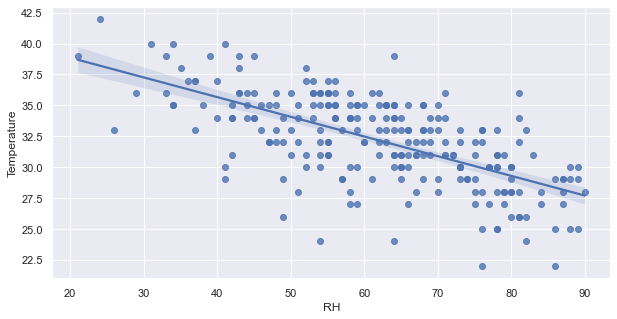

In [47]:
plt.figure(figsize=(10, 5))
sns.regplot(x='RH',y='Temperature',data=df1)

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

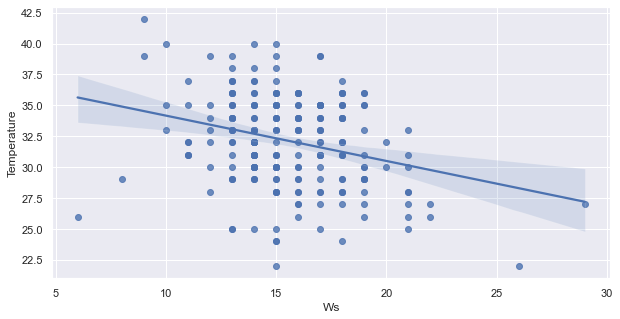

In [48]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Ws',y='Temperature',data=df1)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

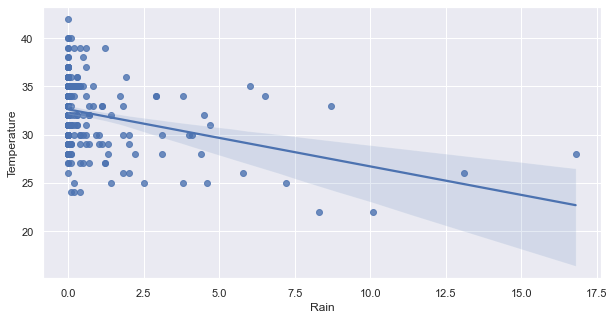

In [49]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Rain',y='Temperature',data=df1)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

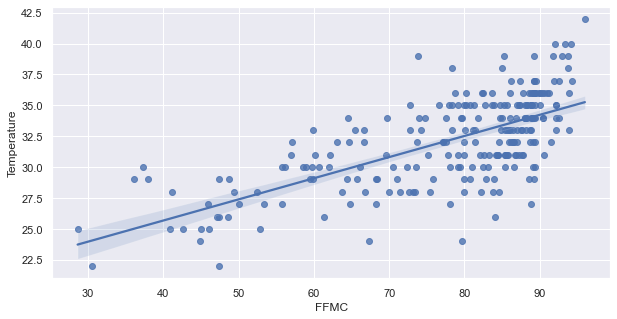

In [50]:
plt.figure(figsize=(10, 5))
sns.regplot(x='FFMC',y='Temperature',data=df1)

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

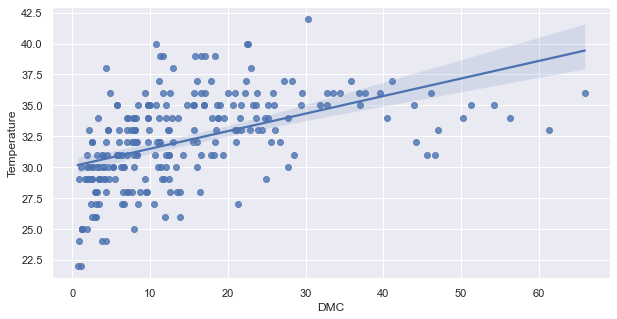

In [51]:
plt.figure(figsize=(10, 5))
sns.regplot(x='DMC',y='Temperature',data=df1)

<AxesSubplot:xlabel='DC', ylabel='Temperature'>

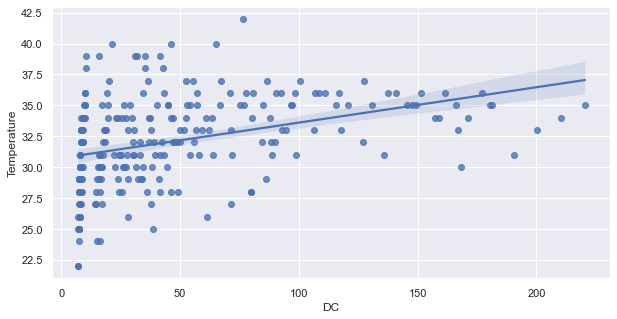

In [52]:
plt.figure(figsize=(10, 5))
sns.regplot(x='DC',y='Temperature',data=df1)

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

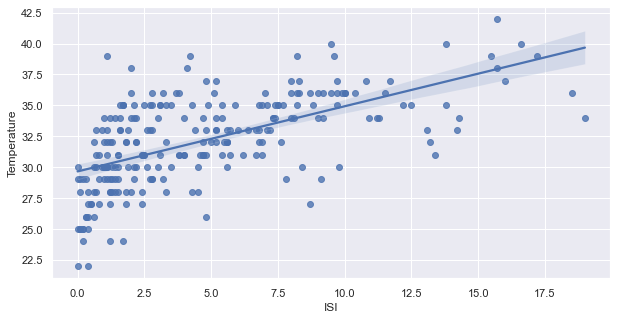

In [53]:
plt.figure(figsize=(10, 5))
sns.regplot(x='ISI',y='Temperature',data=df1)

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

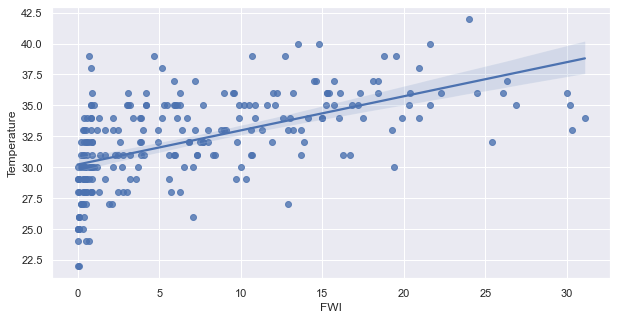

In [54]:
plt.figure(figsize=(10, 5))
sns.regplot(x='FWI',y='Temperature',data=df1)

regression

In [55]:
x=df1.drop('Temperature',axis=1)
y=df1['Temperature']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [57]:
scaler=StandardScaler()

In [58]:
x_train_scaled=scaler.fit_transform(X_train)

In [59]:
x_test_scaled=scaler.transform(X_test)

In [60]:
x_train_scaled

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.        , -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
         0.        , -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.        ,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.        ,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
         0.        ,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
         0.        , -1.01242284]])

In [61]:
x_test_scaled

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.        , -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.        ,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.        ,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.        ,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
         0.        , -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.        , -1.01242284]])

In [62]:
regression=LinearRegression()

In [63]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [64]:
print(regression.coef_)

[-0.36440793 -0.22635361 -1.44134283 -0.7142619  -0.23278709  0.96421264
 -0.01542755  0.65162217  0.13076922  0.26277398 -0.28088408  0.
  0.24272792]


In [65]:
regression.score(x_test_scaled,y_test)

0.442435458586767

In [66]:
print(regression.intercept_)

32.074074074074076


In [67]:
reg_pred=regression.predict(x_test_scaled)

In [68]:
reg_pred

array([31.84063173, 33.08286672, 33.29508782, 24.75854227, 29.24684893,
       33.62257975, 31.75352242, 34.58358479, 31.72328528, 32.36866716,
       33.67767751, 33.25839479, 35.65738396, 31.97503396, 34.04296478,
       33.22479669, 26.47624061, 36.04714436, 33.19344089, 23.64162513,
       32.1343707 , 32.60093493, 33.02495519, 32.94209422, 29.99121682,
       32.68893888, 33.04332061, 32.27268269, 32.09347766, 34.07041738,
       34.51057574, 33.74628677, 34.33569821, 32.69179752, 31.163211  ,
       28.76146317, 32.70115088, 31.76403503, 33.04719502, 34.07436881,
       33.80864285, 35.5411224 , 34.22166608, 37.18514799, 32.83625502,
       36.64474361, 32.38777677, 35.33018647, 30.75190986, 30.94859328,
       32.28439034, 39.1982583 , 32.58656685, 34.55522617, 27.14324627,
       36.9254135 , 33.79514082, 33.90475288, 29.13300329, 32.27931989,
       32.48201446, 32.01342537, 24.82170293, 36.32093954, 36.06160239,
       29.12469145, 29.4759838 , 29.4409954 , 36.02022222, 28.49

Text(0, 0.5, 'Predicted data')

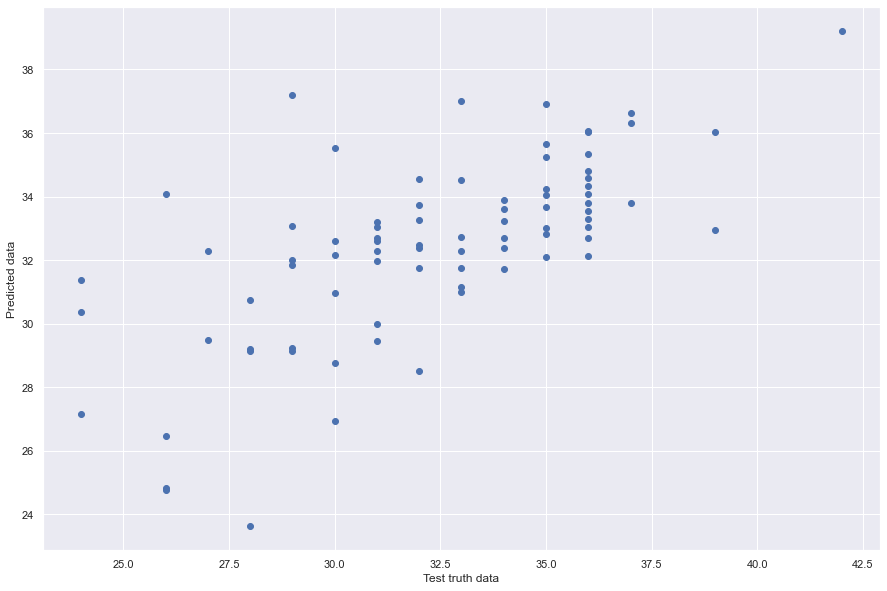

In [69]:
plt.scatter(x=y_test,y=reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [70]:
residuals=y_test-reg_pred

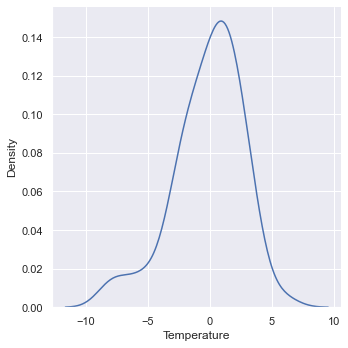

In [71]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

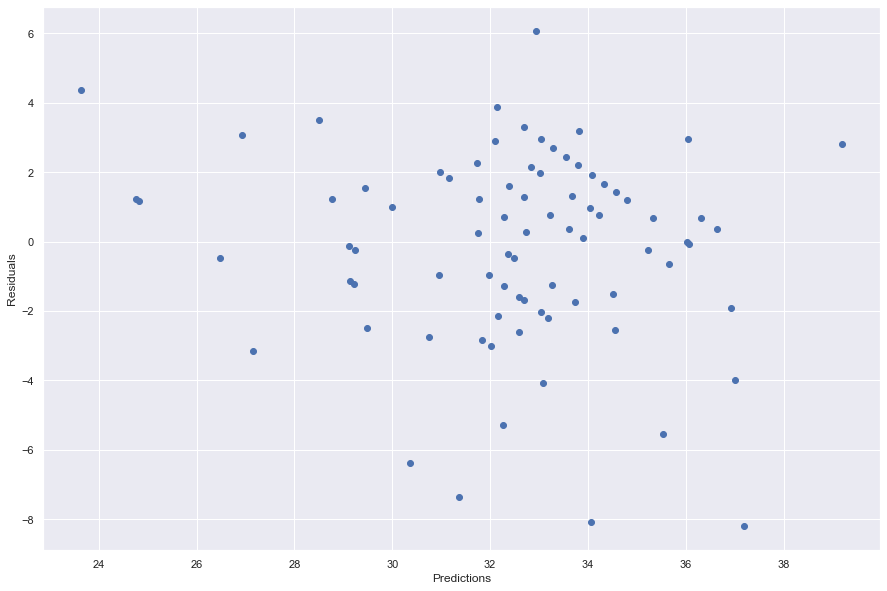

In [72]:
plt.scatter(x=reg_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

performance matrix

In [73]:
lr_mse=mean_squared_error(y_test,reg_pred)
lr_mae=mean_absolute_error(y_test,reg_pred)
lr_mse_sqrt=np.sqrt(mean_squared_error(y_test,reg_pred))
print(lr_mse)
print(lr_mae)
print(lr_mse_sqrt)

7.718372490369679
2.1359729920427823
2.7781959056858603


In [74]:
lr_score=r2_score(y_test,reg_pred)
lr_score

0.442435458586767

Adjusted R square

In [75]:
ad_rsquare_lr=1 - (1-lr_score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

In [76]:
ad_rsquare_lr

0.3342512938349457

ridge regression

In [77]:
ridge=Ridge()

In [78]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [79]:
print(ridge.coef_)

[-0.35859242 -0.22361881 -1.4246319  -0.71357223 -0.23419537  0.96377519
  0.02101355  0.62937949  0.10421058  0.21661456 -0.22339104  0.
  0.23878478]


In [80]:
print(ridge.intercept_)

32.074074074074076


In [81]:
ridge_pred=ridge.predict(x_test_scaled)

In [82]:
ridge_pred

array([31.84522025, 33.07801866, 33.32143372, 24.79311009, 29.25112242,
       33.64529216, 31.73250629, 34.61248132, 31.74324356, 32.36616109,
       33.66795511, 33.25653199, 35.63844353, 31.96899817, 33.96914585,
       33.23538038, 26.51482354, 36.03947803, 33.1811996 , 23.66716673,
       32.09793728, 32.58109242, 33.0232019 , 32.94038806, 29.98560291,
       32.70770994, 33.04393524, 32.25760392, 32.08900203, 34.04925765,
       34.50009163, 33.73910985, 34.31012523, 32.69207555, 31.13817866,
       28.77144618, 32.67740941, 31.75746455, 33.04099284, 34.04747401,
       33.83814527, 35.52736647, 34.22117957, 37.13751492, 32.83627381,
       36.68161808, 32.36960708, 35.31854183, 30.73882088, 30.95562496,
       32.291368  , 39.20825907, 32.57797449, 34.55202448, 27.17475543,
       36.9522104 , 33.81487792, 33.86236693, 29.15322938, 32.26413039,
       32.47914425, 32.00320521, 24.82974268, 36.34245785, 36.10298328,
       29.15073976, 29.45086263, 29.43904153, 36.0418111 , 28.50

Text(0, 0.5, 'Predicted data')

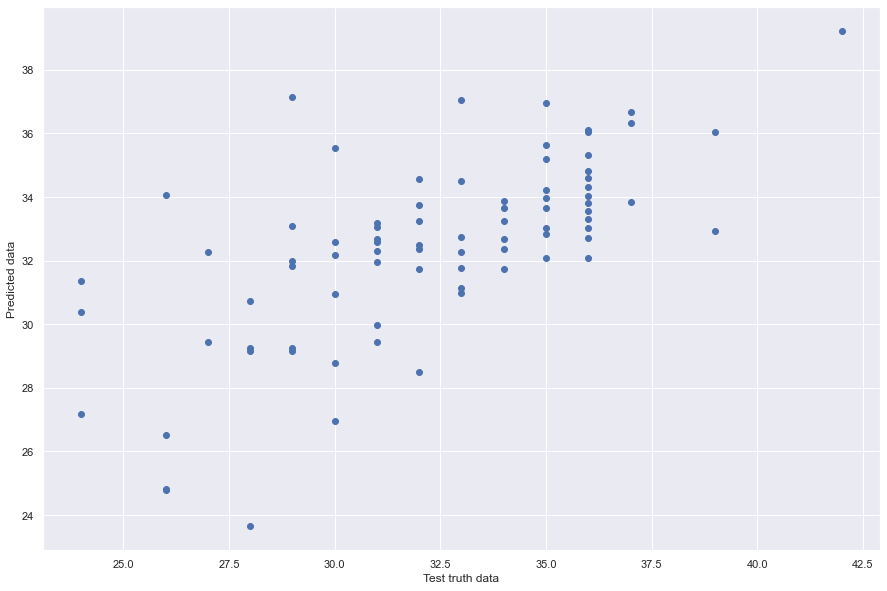

In [83]:
plt.scatter(x=y_test,y=ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

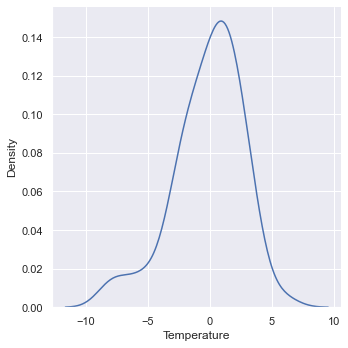

In [84]:
residuals=y_test-reg_pred
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

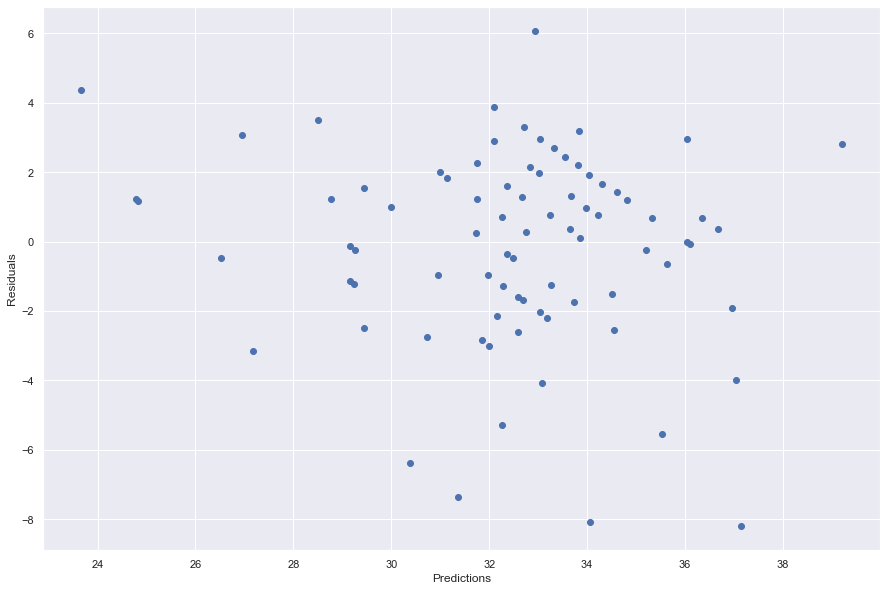

In [85]:
plt.scatter(x=ridge_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [86]:
rr_mse=(mean_squared_error(y_test,ridge_pred))
rr_mae=(mean_absolute_error(y_test,ridge_pred))
rr_mse_sqrt=(np.sqrt(mean_squared_error(y_test,ridge_pred)))
print(rr_mse)
print(rr_mae)
print(rr_mse_sqrt)

7.700169527845211
2.136357087841748
2.7749179317315336


In [87]:
rr_score=r2_score(y_test,ridge_pred)
rr_score

0.44375041539469273

In [88]:
r_ad_rquare=1 - (1-rr_score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)
r_ad_rquare

0.33582139151605095

lasso

In [89]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)

Lasso()

In [90]:
print(lasso.coef_)


[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [91]:
print(lasso.intercept_)

32.074074074074076


In [92]:
lasso_pred=lasso.predict(x_test_scaled)

In [93]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

Text(0, 0.5, 'Predicted data')

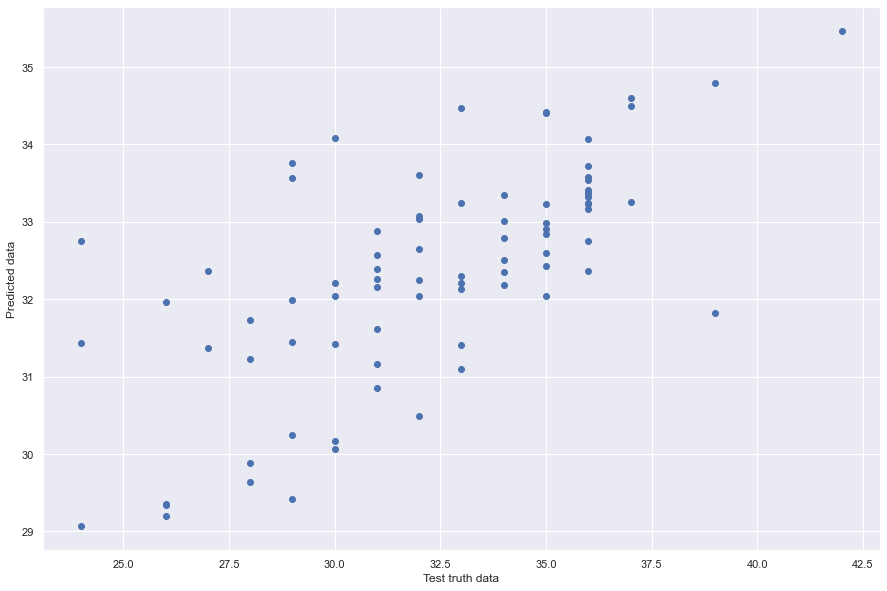

In [94]:
plt.scatter(x=y_test,y=lasso_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")


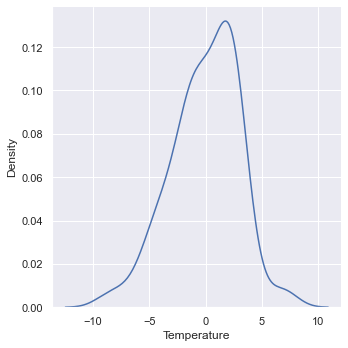

In [95]:
residuals=y_test-lasso_pred
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

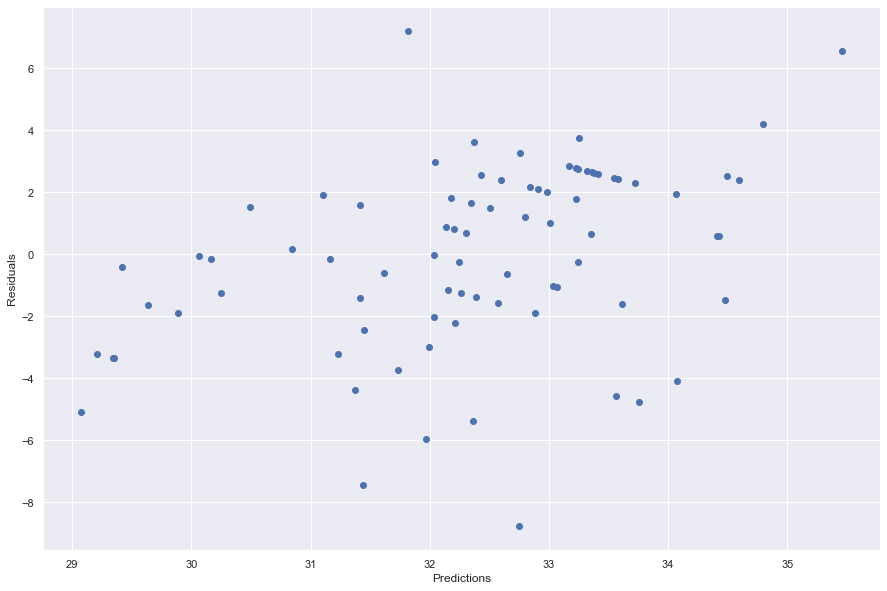

In [96]:
plt.scatter(x=lasso_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [97]:
lasso_mse=(mean_squared_error(y_test,lasso_pred))
lasso_mae=(mean_absolute_error(y_test,lasso_pred))
lasso_mse_sqrt=(np.sqrt(mean_squared_error(y_test,lasso_pred)))
print(lasso_mse)
print(lasso_mae)
print(lasso_mse_sqrt)

8.69462464944341
2.370968686727018
2.9486648927003234


In [98]:
lasso_score=r2_score(y_test,lasso_pred)
lasso_score

0.3719123543887275

In [99]:
lasso_ad_rsquare=1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)
lasso_ad_rsquare

0.250044602255197

elastic_net

In [100]:
elastic_net=ElasticNet()

In [101]:
elastic_net.fit(x_train_scaled,y_train)

ElasticNet()

In [102]:
print(elastic_net.coef_)

[-0.         -0.         -0.77155493 -0.27327033 -0.02945645  0.70980198
  0.11177449  0.          0.20914599  0.04593431  0.12829249  0.
  0.        ]


In [103]:
print(elastic_net.intercept_)

32.074074074074076


In [104]:
elastic_net_pred=elastic_net.predict(x_test_scaled)

In [105]:
elastic_net_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

Text(0, 0.5, 'Predicted data')

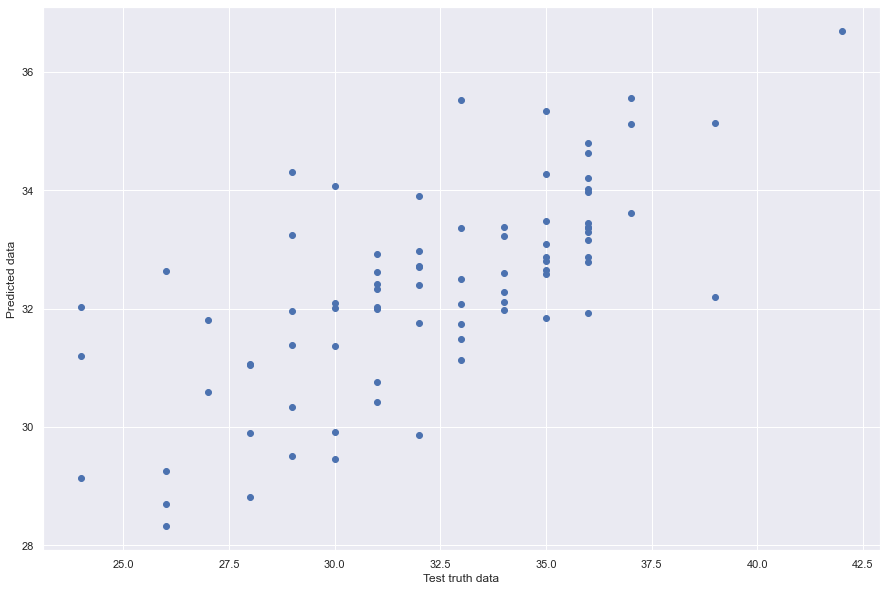

In [106]:
plt.scatter(x=y_test,y=elastic_net_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

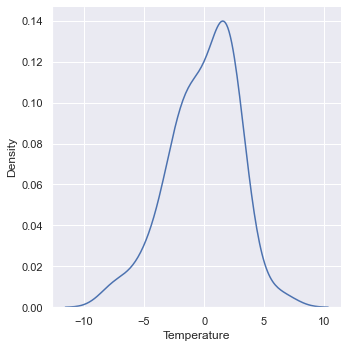

In [107]:
residuals=y_test-elastic_net_pred
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'Residuals')

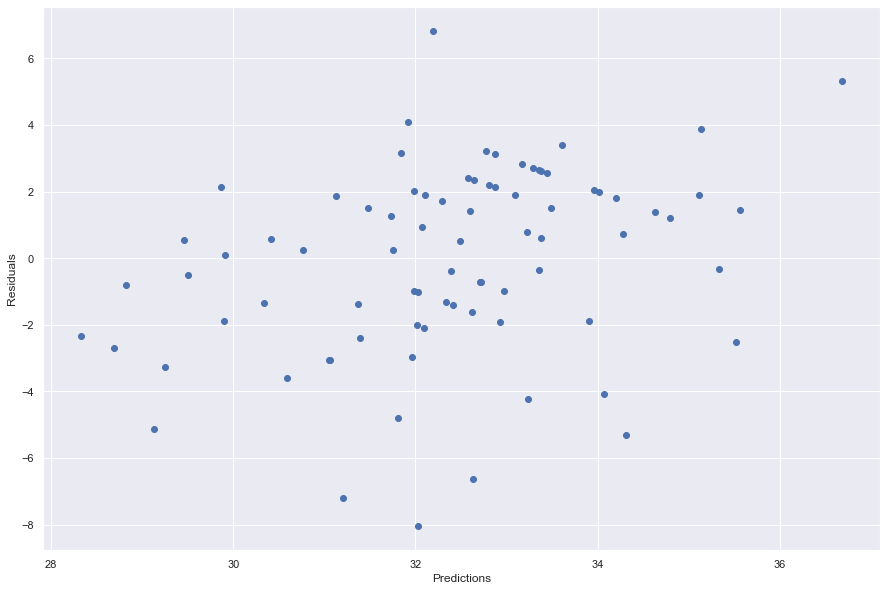

In [108]:
plt.scatter(x=elastic_net_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [109]:
elastic_mse=(mean_squared_error(y_test,elastic_net_pred))
elastic_mae=(mean_absolute_error(y_test,elastic_net_pred))
elastic_mse_sqrt=(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))
print(elastic_mse)
print(elastic_mae)
print(elastic_mse_sqrt)

7.918267418307838
2.279648251186519
2.813941616009088


In [110]:
elastic_score=r2_score(y_test,elastic_net_pred)
elastic_score

0.4279953257782334

In [111]:
elastic_ad_rsquare=1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

In [112]:
elastic_ad_rsquare

0.317009344212816

In [113]:
print(lr_mse)
print(rr_mse)
print(lasso_mse)
print(elastic_mse)

7.718372490369679
7.700169527845211
8.69462464944341
7.918267418307838


In [114]:
print(lr_mae)
print(rr_mae)
print(lasso_mae)
print(elastic_mae)

2.1359729920427823
2.136357087841748
2.370968686727018
2.279648251186519


In [115]:
print(lr_mse_sqrt)
print(rr_mse_sqrt)
print(lasso_mse_sqrt)
print(elastic_mse_sqrt)

2.7781959056858603
2.7749179317315336
2.9486648927003234
2.813941616009088


In [116]:
print(lr_score)
print(rr_score)
print(lasso_score)
print(elastic_score)

0.442435458586767
0.44375041539469273
0.3719123543887275
0.4279953257782334


In [117]:
print(ad_rsquare_lr)
print(r_ad_rquare)
print(lasso_ad_rsquare)
print(elastic_ad_rsquare)

0.3342512938349457
0.33582139151605095
0.250044602255197
0.317009344212816
